Outline
- Cover
- Speaker
- Overview
- What is Qiskit Runtime
    - Why do we want to use Qiskit Runtime?
- Getting started with Qiskit Runtime
    - Installation
    - Get access credentials
    - Run "hello world" program
- Primitives
    - Why do we want to change to primitives model?
    - What are the primitives?
        - Sampler
        - Estimator
    - Demo
        - Grover with sampler
        - VQE with estimator
            - Qiskit Nature and other modules will be refactored

# Qiskit Runtime talk

By Junye Huang, Quantum Developer Advocate

Date: May 24, 2022

# About the speaker

Junye Huang is a Quantum Developer Advocate focusing on quantum education.

# Outline

- What is Qiskit Runtime
    - Why do we want to use Qiskit Runtime?
- Getting started with Qiskit Runtime
    - Installation
    - Get access credentials
    - Run "hello world" program
- Primitives
    - Why do we want to change to primitives model?
    - What are the primitives?
        - Sampler
        - Estimator
    - Demo
        - Grover with sampler
        - VQE with estimator
            - Qiskit Nature and other modules will be refactored

# What is Qiskit Runtime

Qiskit Runtime is a new programming model, bring quantum closer to classical to speed up hybrid workflow


## Why do we want  to use Qiskit Runtime?

Qiskit Runtime can speed up hybrid workflow

# Getting started with Qiskit Runtime

# Installation

```bash
pip install qiskit
pip install qiskit-ibm-runtime
```

# Find your access credentials

You can access Qiskit Runtime from either IBM Quantum or IBM Cloud.

## IBM Quantum

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account.
QiskitRuntimeService.save_account(channel="ibm_quantum", token="MY_IBM_QUANTUM_TOKEN")

Retrieve IBM Quantum token here: https://quantum-computing.ibm.com/account

## IBM Cloud

In [ ]:
# Save an IBM Cloud account.
QiskitRuntimeService.save_account(channel="ibm_cloud", 
                                  token="MY_IBM_CLOUD_API_KEY", 
                                  instance="MY_IBM_CLOUD_CRN")

Retrieve IBM Cloud token here: https://cloud.ibm.com/docs/quantum-computing?topic=quantum-computing-quickstart

# Run "Hello World" program

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
program_inputs = {'iterations': 1}
options = {"backend_name": "ibmq_qasm_simulator"}
job = service.run(program_id="hello-world",
                options=options,
                inputs=program_inputs
                )
print(f"job id: {job.job_id}")
result = job.result()
print(result)

job id: ca5lj9ogeghp9h38bu40
Hello, World!


# Qiskit Primitives

What are they and why do we need them?

# Sampler primitive

# Estimator primitive

# More primitives in the roadmap

- Integrator
- Discriminator

# How to use Sampler primitive

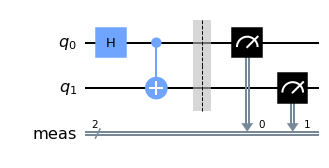

In [2]:
from qiskit import QuantumCircuit

bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
bell.measure_all()
bell.draw()

In [3]:
from qiskit_ibm_runtime import Sampler

with Sampler(circuits=bell, service=service, options={ "backend": "ibmq_qasm_simulator" }) as sampler:
    result = sampler(circuit_indices=[0], shots=1024)
    print(result)

SamplerResult(quasi_dists=[{'11': 0.505859375, '00': 0.494140625}], metadata=[{'header_metadata': {}, 'shots': 1024}])


## Running mutiple circuits

In [5]:
with Sampler(circuits=[bell]*3, service=service, options={ "backend": "ibmq_qasm_simulator" }) as sampler:
    result = sampler(circuit_indices=[0, 1, 2], shots=2048)
    print(result)

SamplerResult(quasi_dists=[{'11': 0.4970703125, '00': 0.5029296875}, {'00': 0.49462890625, '11': 0.50537109375}, {'11': 0.4990234375, '00': 0.5009765625}], metadata=[{'header_metadata': {}, 'shots': 2048}, {'header_metadata': {}, 'shots': 2048}, {'header_metadata': {}, 'shots': 2048}])


# Running parameterized circuits

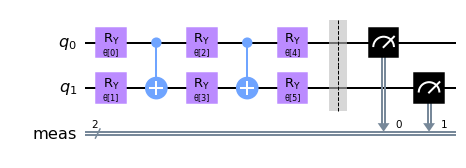

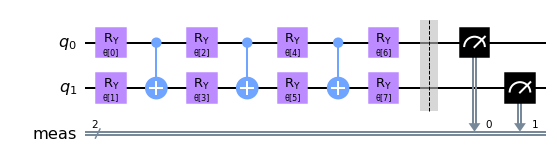

In [11]:
from qiskit.circuit.library import RealAmplitudes
from IPython.display import display

# parameterized circuit
pqc = RealAmplitudes(num_qubits=2, reps=2)
pqc.measure_all()
pqc2 = RealAmplitudes(num_qubits=2, reps=3)
pqc2.measure_all()
display(pqc.decompose().draw())
display(pqc2.decompose().draw())

In [12]:
theta1 = [0, 1, 1, 2, 3, 5]
theta2 = [1, 2, 3, 4, 5, 6]
theta3 = [0, 1, 2, 3, 4, 5, 6, 7]

with Sampler(circuits=[pqc, pqc2], service=service, options={ "backend": "ibmq_qasm_simulator" }) as sampler:
    result = sampler(circuit_indices=[0, 0, 1], parameter_values=[theta1, theta2, theta3])
    print(result)

SamplerResult(quasi_dists=[{'00': 0.1298828125, '10': 0.078125, '11': 0.4541015625, '01': 0.337890625}, {'01': 0.0400390625, '11': 0.28125, '10': 0.609375, '00': 0.0693359375}, {'11': 0.0283203125, '01': 0.6767578125, '00': 0.2041015625, '10': 0.0908203125}], metadata=[{'header_metadata': {}, 'shots': 1024}, {'header_metadata': {}, 'shots': 1024}, {'header_metadata': {}, 'shots': 1024}])
